# Denetimsiz Öğrenme

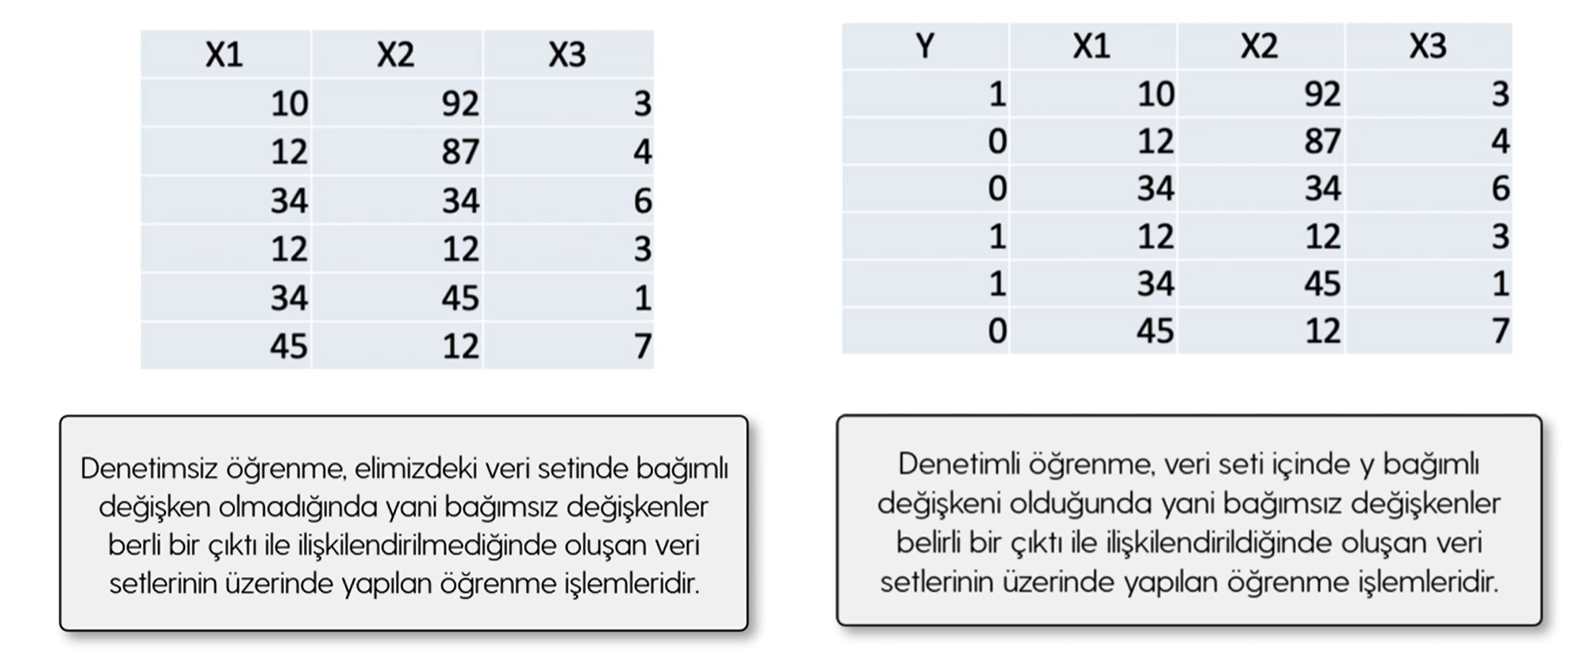

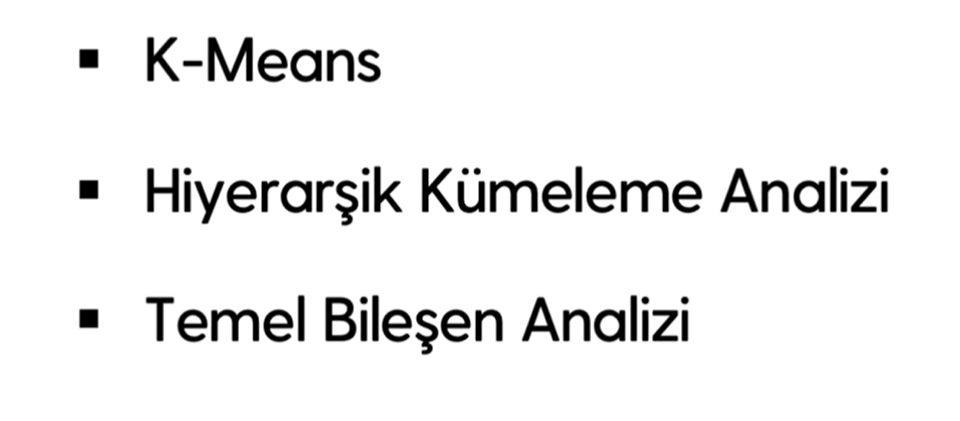

# K-Means

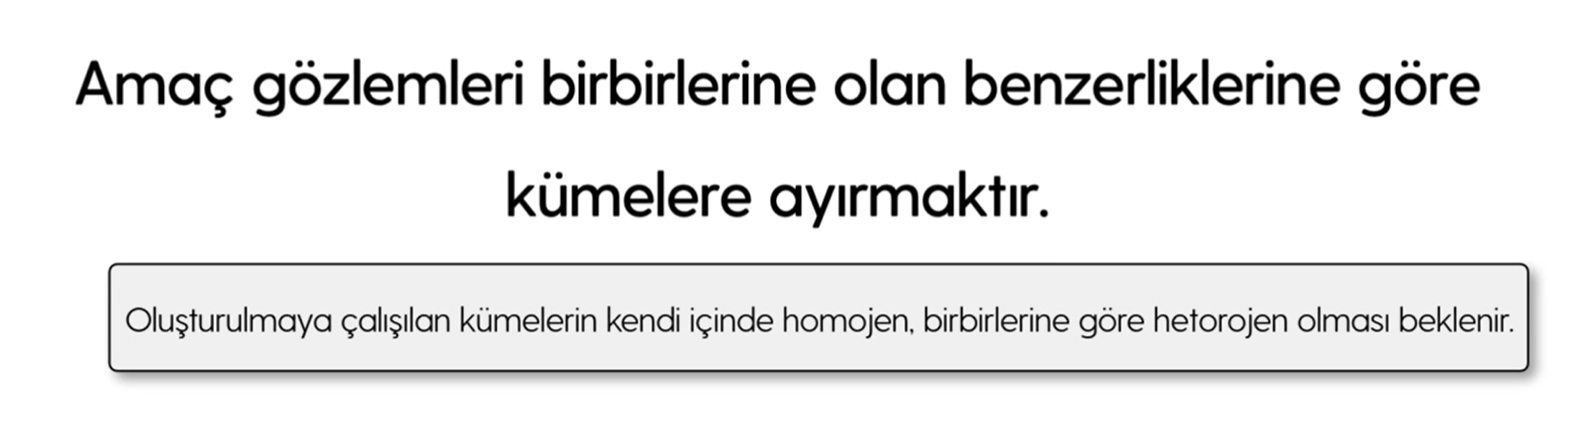

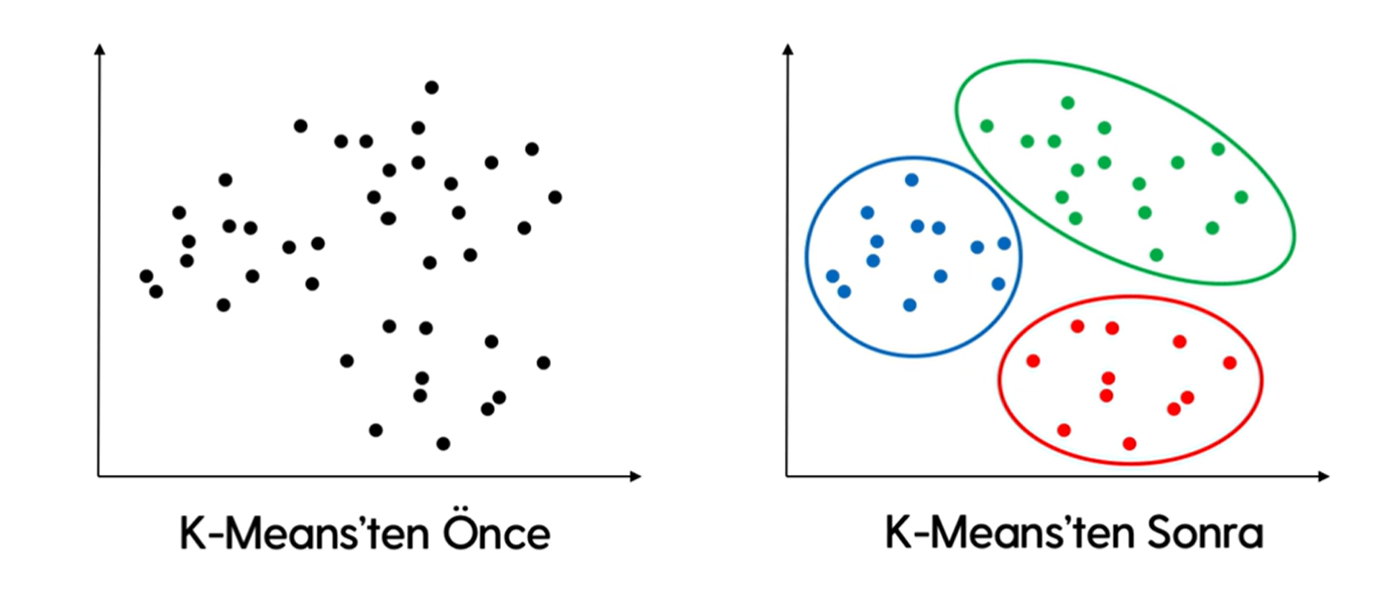

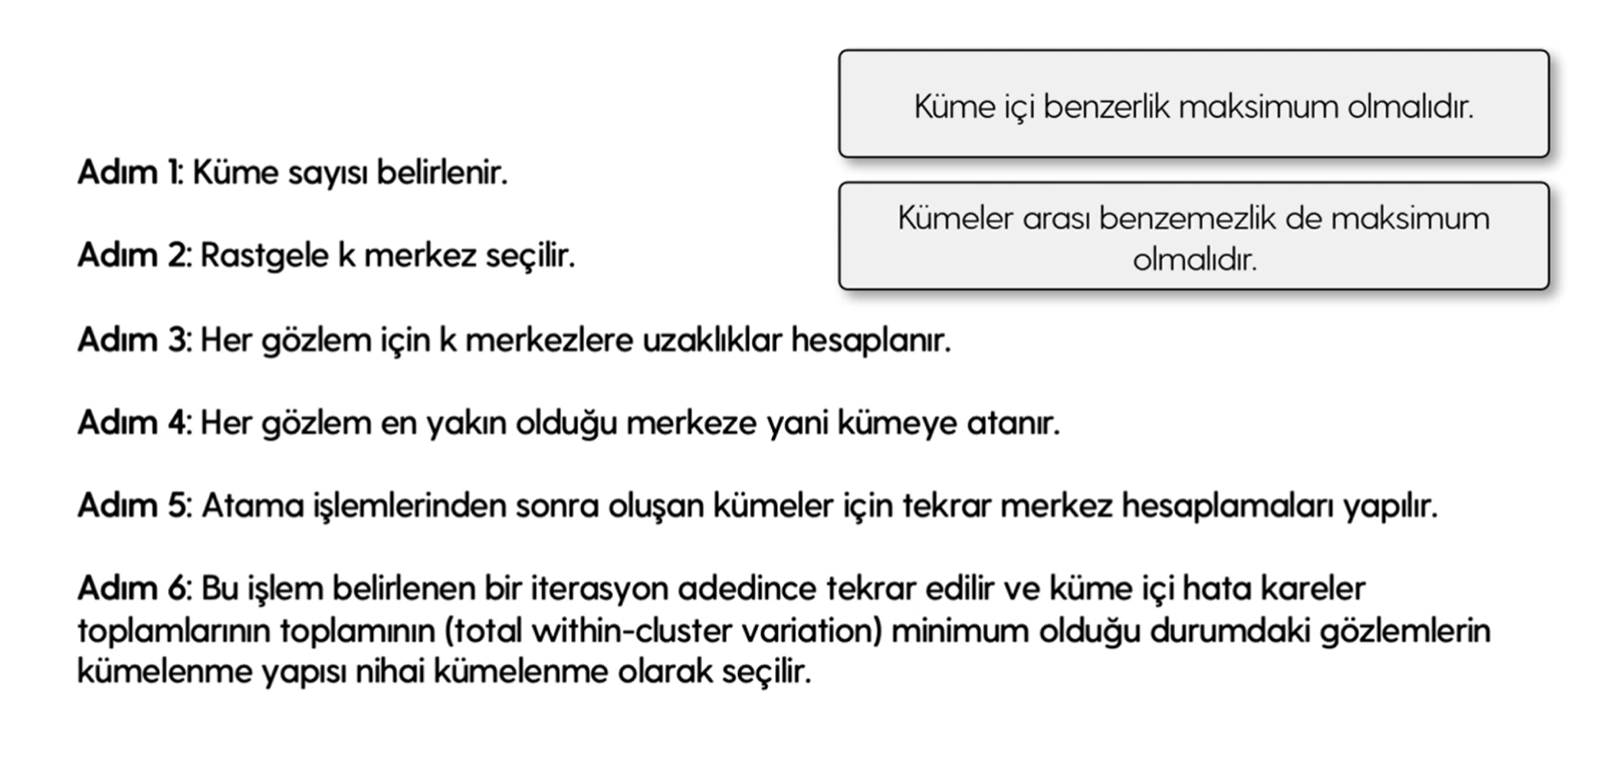

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("USArrests.csv")

In [3]:
df.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

Yukarıda indexlerin olduğu sütunun düşüp "Unnamed:0" olan sütunun index yerine geçmesini sağlayan kod "index_col = 0" sayesinde olur.

In [4]:
df = pd.read_csv("USArrests.csv", index_col = 0)
df.head()

Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

In [5]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
df.describe().T

count     mean        std   min      25%     50%      75%    max
Murder     50.0    7.788   4.355510   0.8    4.075    7.25   11.250   17.4
Assault    50.0  170.760  83.337661  45.0  109.000  159.00  249.000  337.0
UrbanPop   50.0   65.540  14.474763  32.0   54.500   66.00   77.750   91.0
Rape       50.0   21.232   9.366385   7.3   15.075   20.10   26.175   46.0

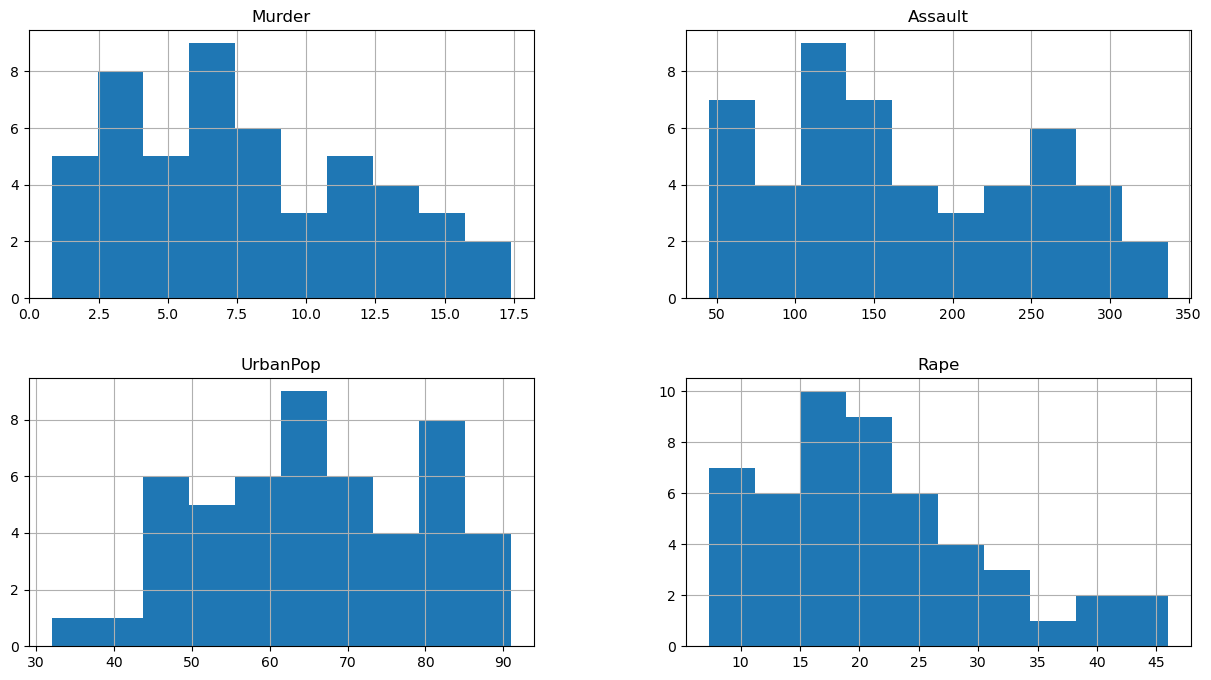

In [8]:
df.hist(figsize = (15,8))
plt.show()

### K-Means Uygulama

In [9]:
kmeans = KMeans(n_clusters = 4)

In [10]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm implemented is "greedy k-means++". It             differs from the vanilla k

In [11]:
k_fit = kmeans.fit(df)

In [12]:
k_fit.n_clusters

4

In [13]:
k_fit.cluster_centers_

array([[  4.16111111,  83.94444444,  57.77777778,  13.52777778],
       [ 12.13571429, 277.64285714,  68.78571429,  29.78571429],
       [  5.95454545, 152.        ,  74.27272727,  20.7       ],
       [ 11.3       , 209.71428571,  65.28571429,  24.77142857]])

In [14]:
k_fit.labels_

array([3, 1, 1, 3, 1, 3, 0, 3, 1, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 3, 3, 2,
       0, 2, 2, 0, 0, 2])

* "n_clusters" küme sayısını belirtmeye yarıyor. Cluster sayısını da "k_fit.n_clusters" şeklinde de çekebiliyoruz.
* "cluster_centers" Belirlenmiş olan kümenin merkezlerini getirmeye yarıyor. Yani bunlar gözlem birimleri. 
* "labels" elimizdeki veri setinin içinde bulunan gözlem birimlerinin hangi clustera ait olduğu bilgisini verir. Gözlemlerin sınf etiketi de denebilir. 

### Kümelerin Görselleştirilmesi

In [15]:
k_means = KMeans(n_clusters = 2).fit(df)

In [16]:
kumeler = k_means.labels_

In [17]:
kumeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

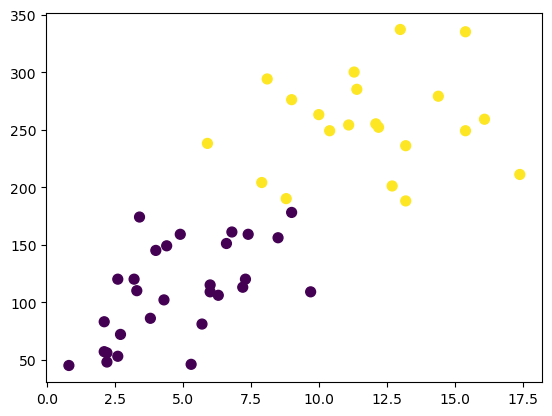

In [18]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = kumeler, s = 50, cmap = "viridis");

* Yukarıdaki görselleştirme sonucunda verimizi iki kümeye ayırmış bulunmaktayız.
* Aşağıda ise merkezleri bu kümeler üzerinde işaretlemeyi hedefleyelim. Yukarıdaki görselleştirme kodu ile aşağıdaki kod aynı hücrede olmalı çünkü ayrı hücrelere koyulurlarsa ayrı ayrı kod olarak çalışıp küme merkezini bulamayacaktır.

In [19]:
merkezler = k_means.cluster_centers_

In [20]:
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

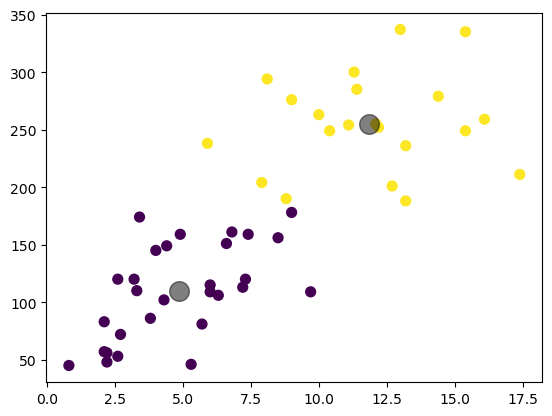

In [21]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c = kumeler, s = 50, cmap = "viridis");
plt.scatter(merkezler[:, 0], merkezler[:, 1], c = "black", s = 200, alpha = 0.5);

# Optimum Küme Sayısının Belirlenmesi

### Elbow Yöntemi

In [22]:
ssd = [] # uzaklık farklarının karelerinin toplamını ifade etsin

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df)
    ssd.append(kmeans.inertia_)

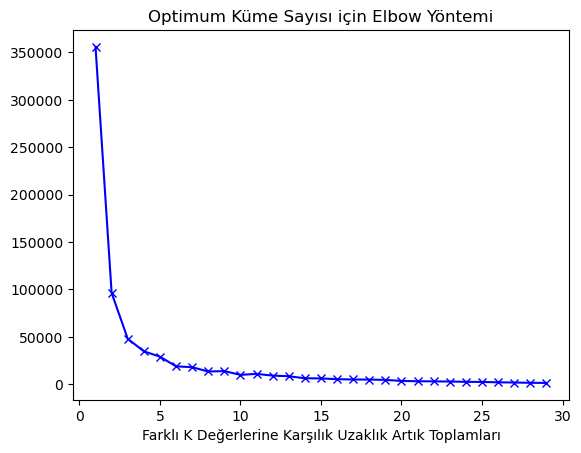

In [23]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme Sayısı için Elbow Yöntemi");

* Yukarıdaki grafiğe bakacak olursak buradaki asıl amacımız grafikteki dirsek yani kırılımın en sert olduğu noktadan sonraya karar vermektir. Açı ve eğimin giderek azaldığı kısıma bakmaktır. Küme sayısı gözlem birimine eşit olması durumunda kümeleme işlemi herbir birimi tekrar etmiş olacak dolayısıyla kümeleme sayısının her zaman gözlem biriminden az olması gerekmektedir. Aşağıda ise elbow yönteminin alternatifi bulunmaktadır. 

In [24]:
!pip install yellowbrick

In [25]:
from yellowbrick.cluster import KElbowVisualizer

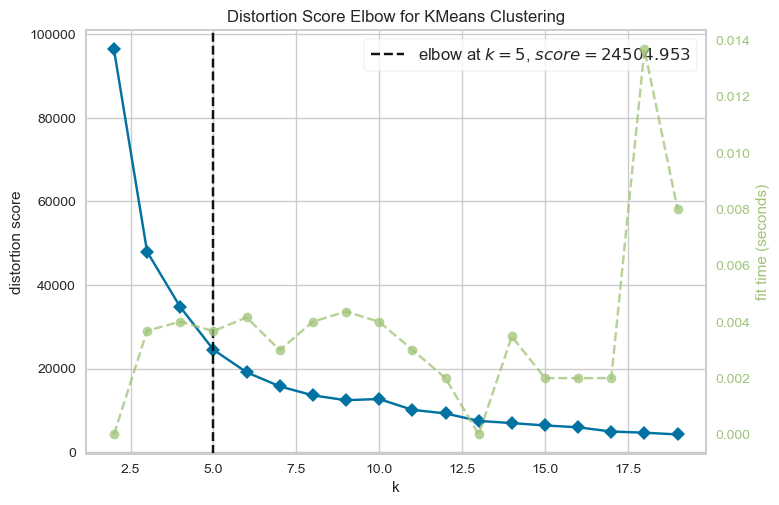

In [26]:
kmeans = KMeans()
visual = KElbowVisualizer(kmeans, k = (2,20)).fit(df)
visual.poof();

* Yukarıdaki görselleştirme sonucuna bakacak olursak bize en optimum küme sayısını bulup grafik üzerinde de göstermektedir. Yukarıdaki sonuca göre 5 kümeye bölmememiz gerektiğini görmekteyiz. Bunun için aşağıda 5 kümedeki haline bakalım

In [27]:
kmeans = KMeans(n_clusters = 5).fit(df)
kmeans

KMeans(n_clusters=5)

In [28]:
kumeler = kmeans.labels_

In [29]:
pd.DataFrame({"Eyaletler": df.index, "Kumeler": kumeler})

Eyaletler  Kumeler
0          Alabama        1
1           Alaska        1
2          Arizona        4
3         Arkansas        2
4       California        1
5         Colorado        2
6      Connecticut        0
7         Delaware        1
8          Florida        4
9          Georgia        2
10          Hawaii        3
11           Idaho        0
12        Illinois        1
13         Indiana        0
14            Iowa        3
15          Kansas        0
16        Kentucky        0
17       Louisiana        1
18           Maine        3
19        Maryland        4
20   Massachusetts        2
21        Michigan        1
22       Minnesota        3
23     Mississippi        1
24        Missouri        2
25         Montana        0
26        Nebraska        0
27          Nevada        1
28   New Hampshire        3
29      New Jersey        2
30      New Mexico        1
31        New York        1
32  North Carolina        4
33    North Dakota        3
34            Ohio        0
35        Oklahoma        2
36          Oregon        2
37    Pennsylvania        0
38    Rhode Island        2
39  South Carolina        1
40    South Dakota        3
41       Tennessee        2
42           Texas        2
43            Utah        0
44         Vermont        3
45        Virginia        2
46      Washington        2
47   West Virginia        3
48       Wisconsin        3
49         Wyoming        2

In [30]:
df["Küme Numarası"] = kumeler

In [31]:
df

Murder  Assault  UrbanPop  Rape  Küme Numarası
Alabama           13.2      236        58  21.2              1
Alaska            10.0      263        48  44.5              1
Arizona            8.1      294        80  31.0              4
Arkansas           8.8      190        50  19.5              2
California         9.0      276        91  40.6              1
Colorado           7.9      204        78  38.7              2
Connecticut        3.3      110        77  11.1              0
Delaware           5.9      238        72  15.8              1
Florida           15.4      335        80  31.9              4
Georgia           17.4      211        60  25.8              2
Hawaii             5.3       46        83  20.2              3
Idaho              2.6      120        54  14.2              0
Illinois          10.4      249        83  24.0              1
Indiana            7.2      113        65  21.0              0
Iowa               2.2       56        57  11.3              3
Kansas             6.0      115        66  18.0              0
Kentucky           9.7      109        52  16.3              0
Louisiana         15.4      249        66  22.2              1
Maine              2.1       83        51   7.8              3
Maryland          11.3      300        67  27.8              4
Massachusetts      4.4      149        85  16.3              2
Michigan          12.1      255        74  35.1              1
Minnesota          2.7       72        66  14.9              3
Mississippi       16.1      259        44  17.1              1
Missouri           9.0      178        70  28.2              2
Montana            6.0      109        53  16.4              0
Nebraska           4.3      102        62  16.5              0
Nevada            12.2      252        81  46.0              1
New Hampshire      2.1       57        56   9.5              3
New Jersey         7.4      159        89  18.8              2
New Mexico        11.4      285        70  32.1              1
New York          11.1      254        86  26.1              1
North Carolina    13.0      337        45  16.1              4
North Dakota       0.8       45        44   7.3              3
Ohio               7.3      120        75  21.4              0
Oklahoma           6.6      151        68  20.0              2
Oregon             4.9      159        67  29.3              2
Pennsylvania       6.3      106        72  14.9              0
Rhode Island       3.4      174        87   8.3              2
South Carolina    14.4      279        48  22.5              1
South Dakota       3.8       86        45  12.8              3
Tennessee         13.2      188        59  26.9              2
Texas             12.7      201        80  25.5              2
Utah               3.2      120        80  22.9              0
Vermont            2.2       48        32  11.2              3
Virginia           8.5      156        63  20.7              2
Washington         4.0      145        73  26.2              2
West Virginia      5.7       81        39   9.3              3
Wisconsin          2.6       53        66  10.8              3
Wyoming            6.8      161        60  15.6              2

# Hiyerarşik Kümeleme

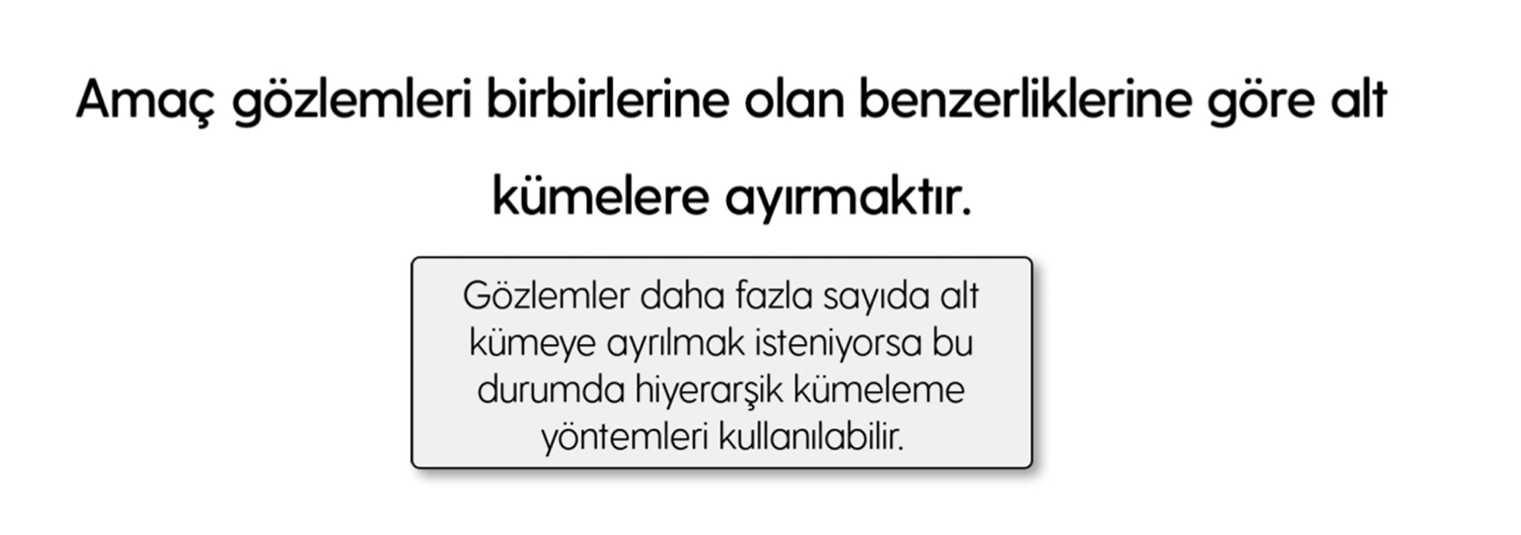

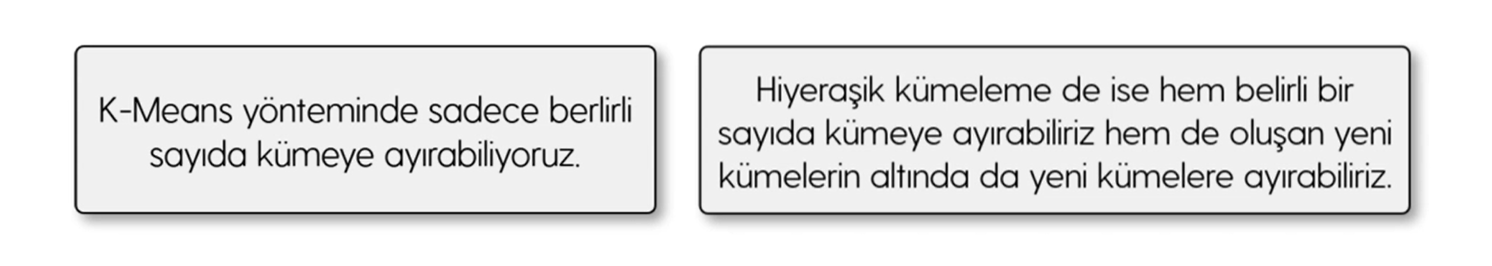

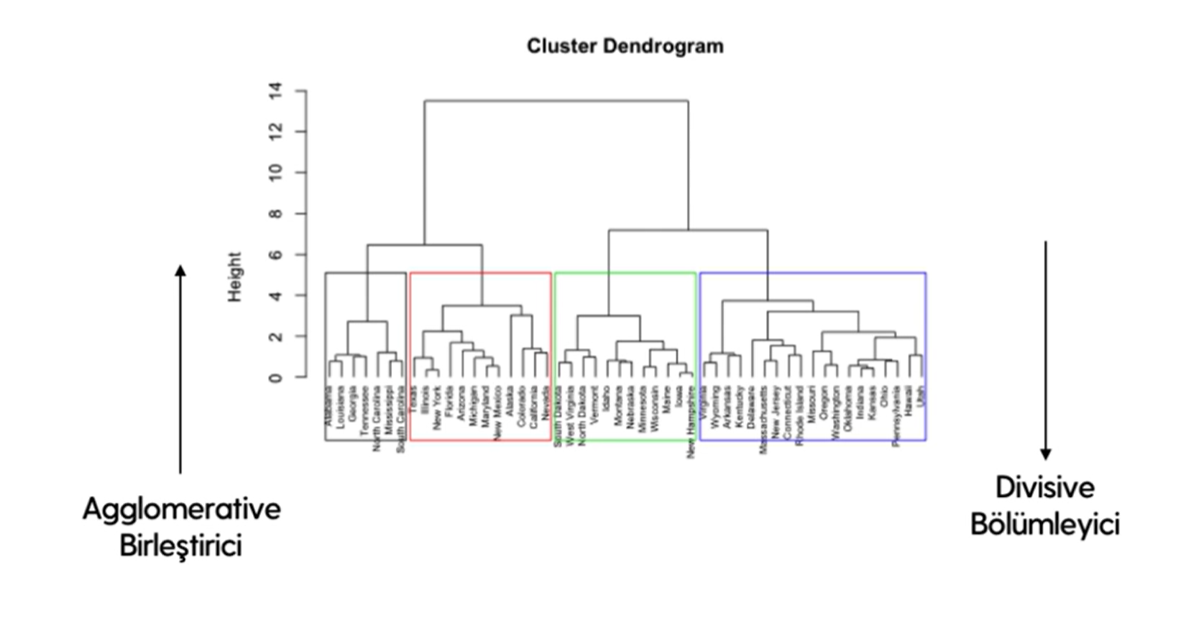

* **Bölümleyici Hiyerarşik Yöntem**: Tüm gözlemler öncelikle bir arada bulunur ve tüm gözlemlerin bir arada bulunduğu küme iki alt kümeye ayrılır. Daha sonra oluşan bu kümelerde birbirine benzemeyen alt kümelere bölünür. Bu işlem gözlem sayısınca alt küme elde edilinceye kadar devam etmektedir. 

* **Birleştirici Hiyerarşik Yöntem**: ise bölümleyinin tam tersidir. Yani çalışmanın başında tüm gözlemler ayrılır ve bu kümeler yukarıya doğru birbirlerine olan benzerliklerine göre bir araya getirilerek yukarıya doğru yeni küme yapıları oluşturmuş olurlar. 

### Birleştirici Kümeleme
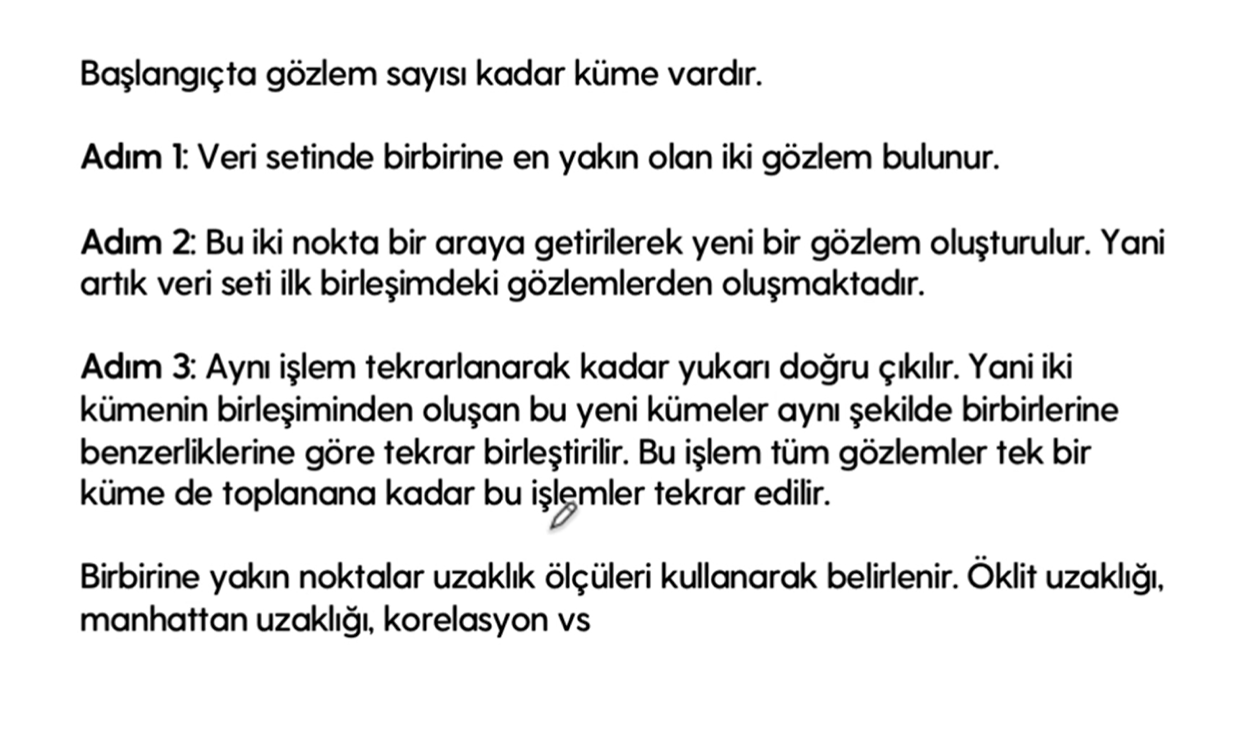

### Bölümleyici Kümeleme
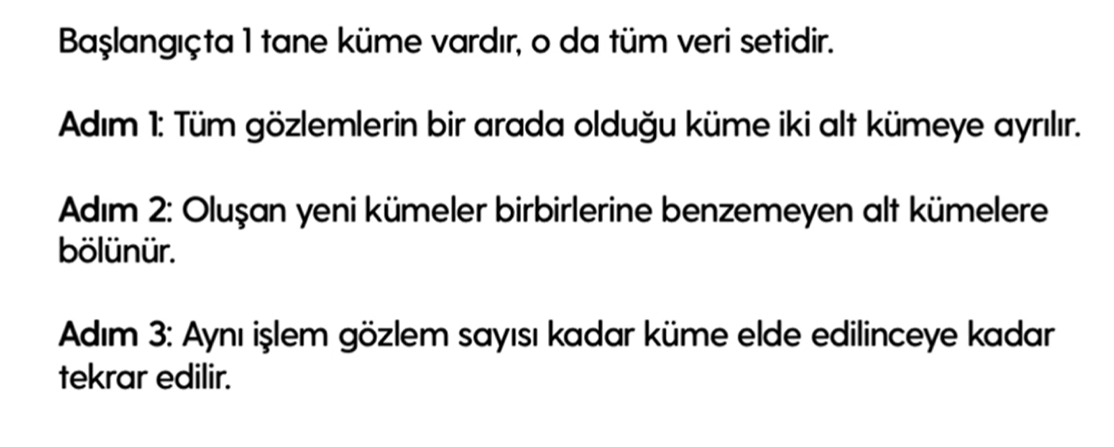

### Kümelem Yöntemleri ile Karar Ağaçlarının Karşılaştırılması
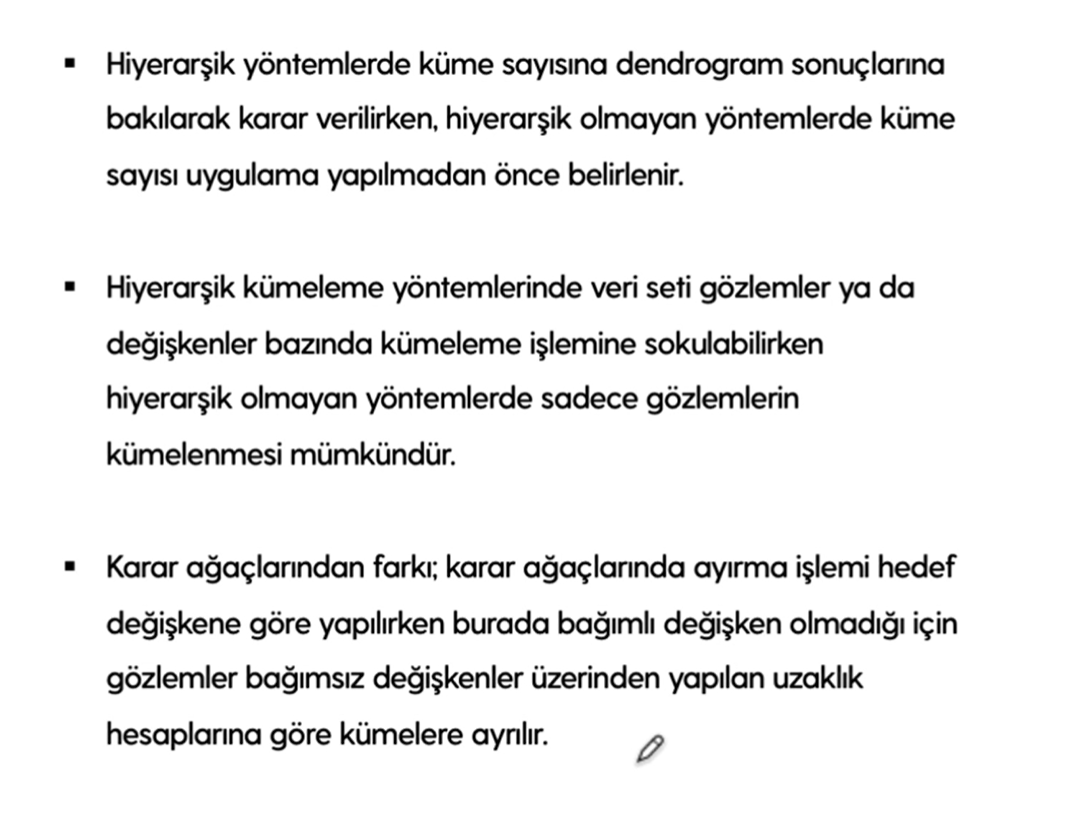

### Hiyerarşik Kümeleme Uygulama

In [32]:
from scipy.cluster.hierarchy import linkage

In [33]:
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")

In [34]:
from scipy.cluster.hierarchy import dendrogram

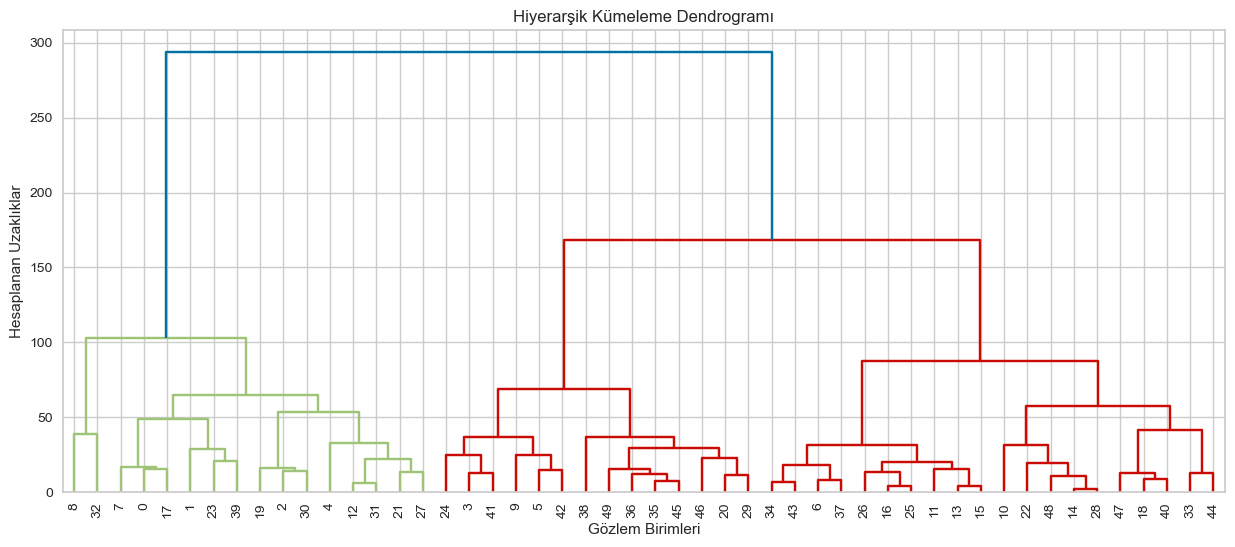

In [35]:
plt.figure(figsize = (15,6))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Hesaplanan Uzaklıklar")
dendrogram(hc_complete, leaf_font_size = 10);

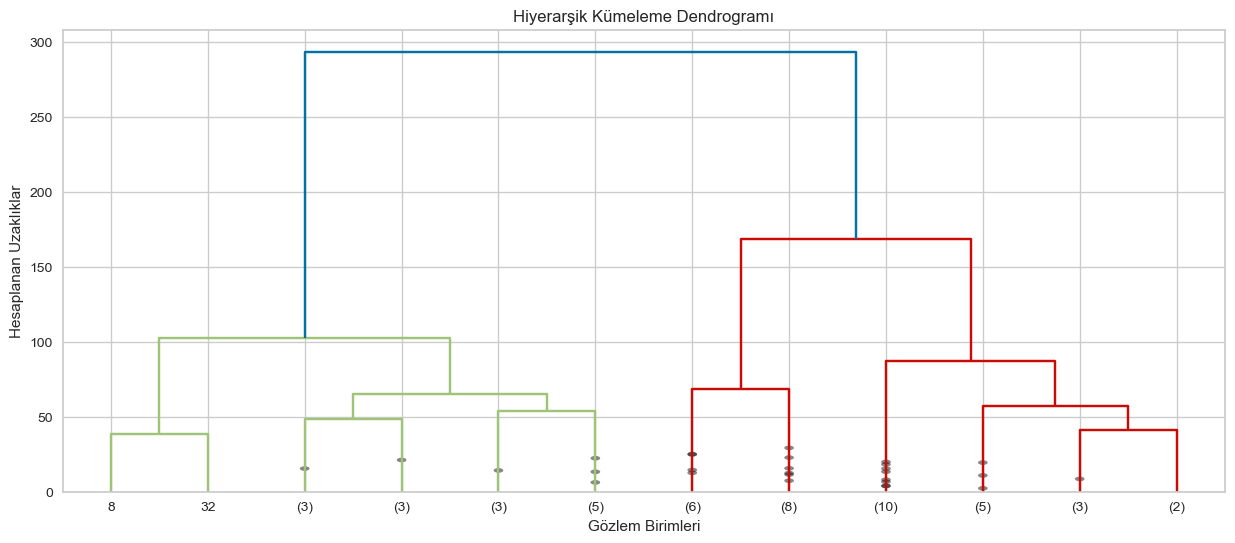

In [37]:
plt.figure(figsize = (15,6))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Hesaplanan Uzaklıklar")
dendrogram(hc_complete, truncate_mode = "lastp", p = 12, show_contracted = True, leaf_font_size = 10);

* truncate_mode = "lastp" p adet göster dedik p'yi belirledik.
* "p = 12" 12 kümeye ayır demek.
* "show_contracted = True" kümeleme yaparken de kaçar adet eleman olduğunu göster demek

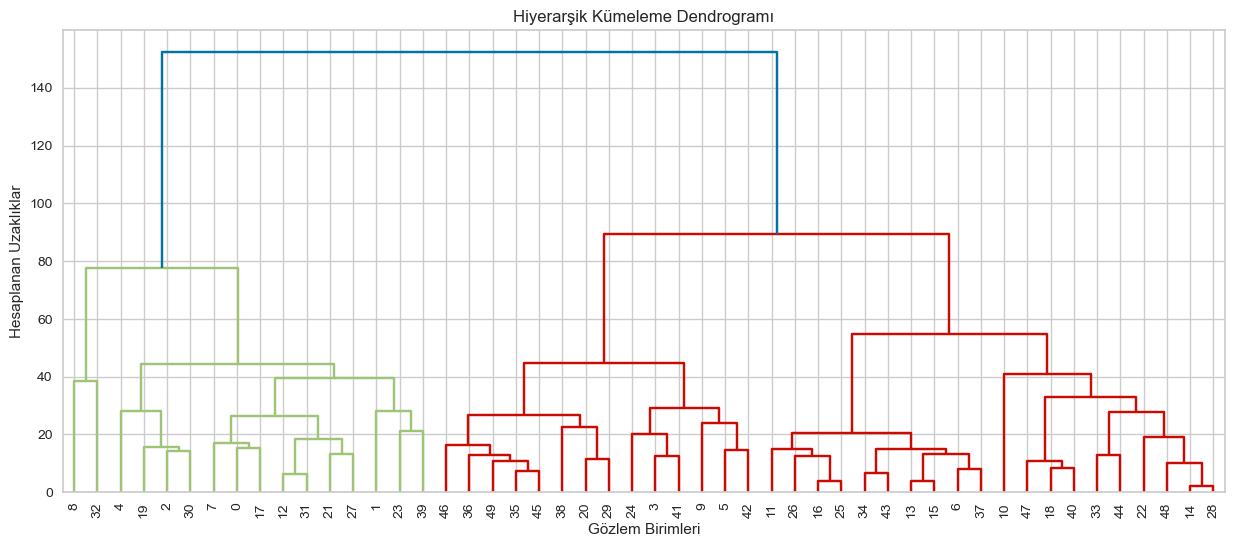

In [38]:
plt.figure(figsize = (15,6))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Hesaplanan Uzaklıklar")
dendrogram(hc_average, leaf_font_size = 10);

# Temel Bileşen Analizi (PCA)

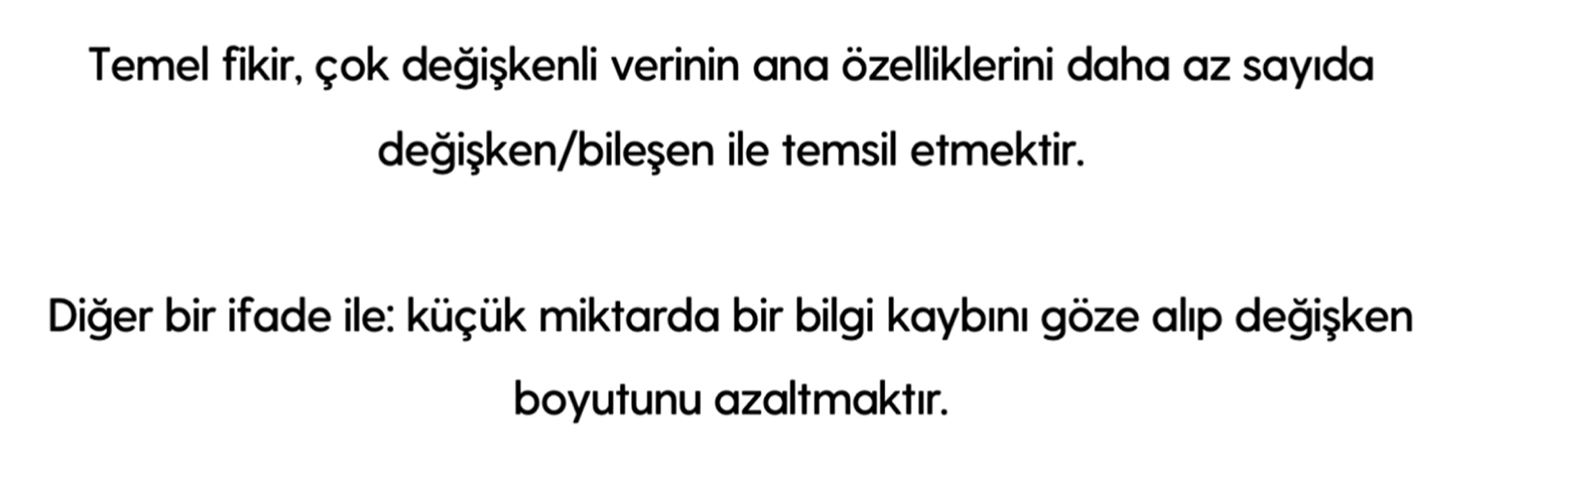

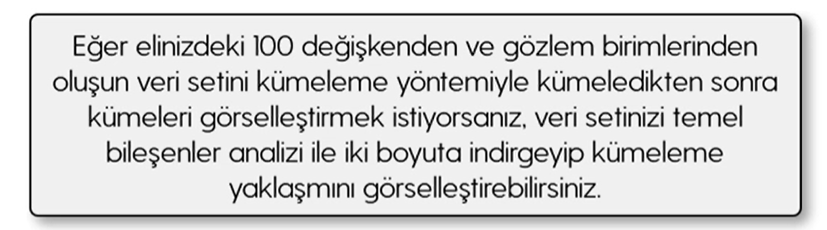

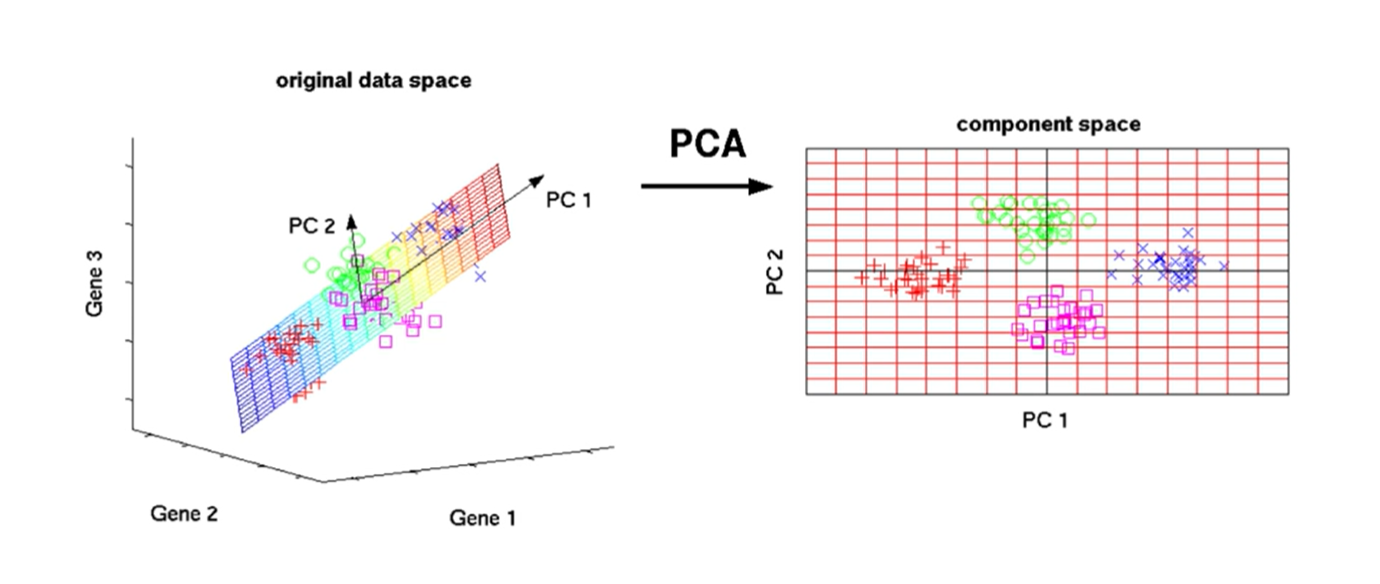

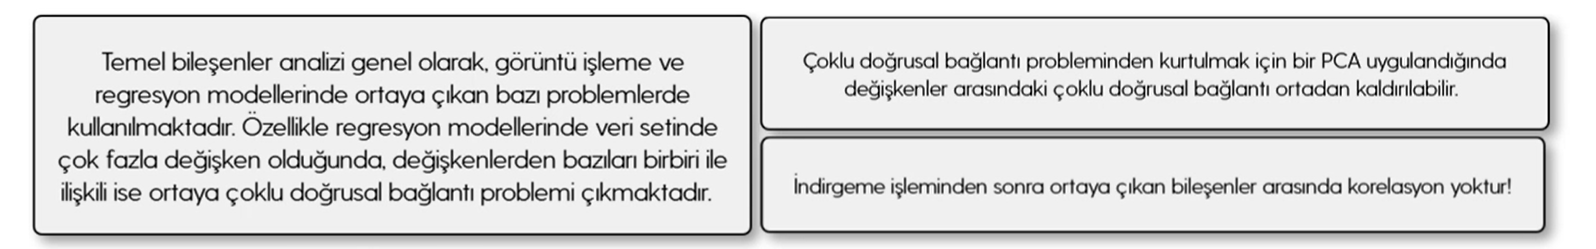

### Temel Bileşen Analizi Uygulama

In [41]:
df = pd.read_csv("Hitters.csv")
df.dropna(inplace = True)
df = df._get_numeric_data() # Sadece sayısal değerleri seç demek
df.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks  PutOuts  Assists  Errors  Salary  
1   414     375      632       43      10   475.0  
2   266     263      880       82      14   480.0  
3   838     354      200       11       3   500.0  
4    46      33      805       40       4    91.5  
5   336     194      282      421      25   750.0

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
df = StandardScaler().fit_transform(df)
df[0:5, 0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(df)

* Yukarıda iki bileşene PCA yöntemi ile verimizi indirgemiş olduk

In [46]:
bilesen_df = pd.DataFrame(data = pca_fit, columns = ["Birinci Bileşen", "İkinci Bileşen"])
bilesen_df

Birinci Bileşen  İkinci Bileşen
0           0.076848       -1.653525
1           0.337127        2.320560
2           3.408362       -0.755757
3          -2.642221        0.361486
4           1.071681        1.511674
..               ...             ...
258        -0.152111        0.331665
259         3.241373        0.391942
260        -1.206322        0.625714
261         2.084856        2.059851
262         1.977963        0.208100

[263 rows x 2 columns]

In [47]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801])

* Açıklanan varyansı getirmiş olduk. 

In [49]:
pca.components_[1]  # bileşenlere erişmemizi sağlıyor

array([ 0.38407792,  0.37764493,  0.22866298,  0.37459128,  0.31026531,
        0.23115759, -0.26820405, -0.19641268, -0.18589726, -0.13386448,
       -0.17692929, -0.17283361, -0.19698297,  0.16295204,  0.17624626,
        0.20978299,  0.05452611])

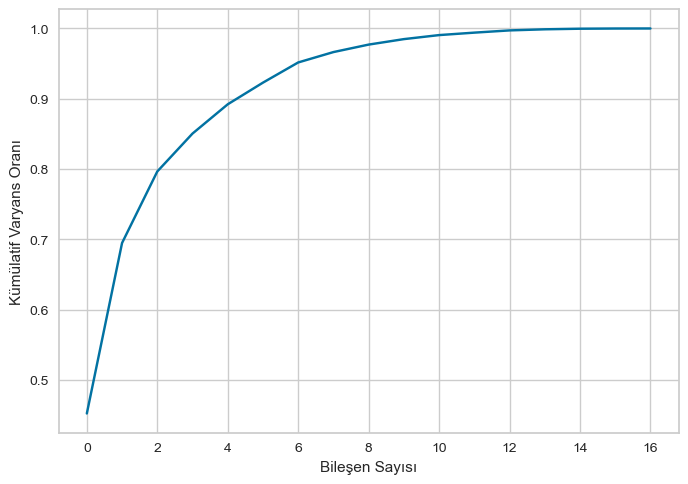

In [51]:
# optimum bileşen sayısı 
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans Oranı");

* Yukarıda PCA içerisinde bileşen sayısını "n_components = 2" şeklinde belirtmezsek eğer değişken sayısı kadar bileşen oluşturulur. Bu durumda eğer değişken sayısı kadar oluşan bileşenlerin kümülatif toplamlarını alırsak ikinci bileşene geldiğimizde birinci ile beraber düşünüldüğünde veri setindeki değişkenliğin ne kadarının açıklandığını öğrenebiliriz. 
* "cumsum" ile kümülatif toplamları belirtiyoruz.
* Varyan dediğimiz şey ise veri setinin içerisindeki taşınan bilgidir.

# **Done**